In [1]:
from cpr.Nivel import Nivel
import cpr.information as info
import numpy as np
import os
import pandas as pd

/usr/local/lib/python2.7/dist-packages/wmf/wmf.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado

In [2]:
info.REMOTE['host'] = 'localhost'

In [3]:
self = Nivel(codigo=93,SimuBasin=True,**info.LOCAL)

/usr/local/lib/python2.7/dist-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


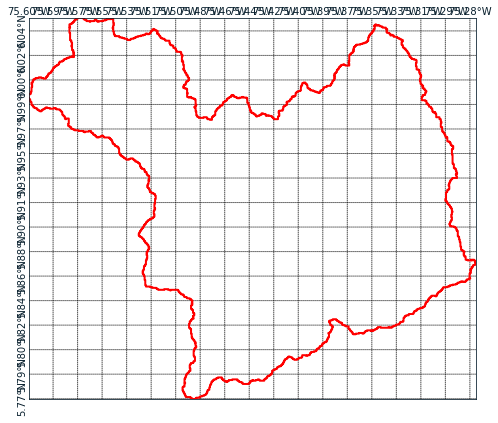

(<mpl_toolkits.basemap.Basemap at 0x7f33b0be56d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33b0c53f10>)

In [4]:
self.Plot_basin()

In [5]:
start = '2018-04-15 15:00'
end = '2018-04-15 23:00'

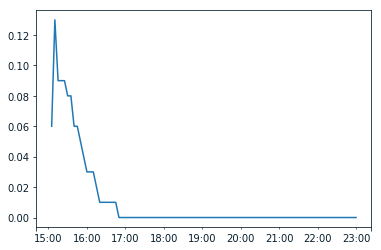

In [6]:
kwargs =  {
        'start':start,
        'end':end,
        'cuenca':self.nc_path,
        'rutaNc':self.radar_path,
        'rutaRes':self.rain_path+self.file_format(start,end),
        'dt':300,
        'umbral': 0.005,
        'verbose':True,
        'super_verbose':True,
        'old':None,
        'save_class':None,
        'store_true':None,
        'save_escenarios':None,
        'store_true':None,
       }

self.radar_rain(start,end).plot()

In [7]:
vec = self.radar_rain_vect(start,end)

In [8]:
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,210068,210069,210070,210071,210072,210073,210074,210075,210076,210077
2018-04-15 15:05:00,0,0,0,0,0,0,0,0,0,0,...,273,280,264,264,264,262,280,264,264,264
2018-04-15 15:10:00,0,0,0,0,0,0,0,0,0,0,...,0,246,0,0,0,0,246,0,0,0
2018-04-15 15:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-15 15:20:00,1322,2313,1322,533,0,1809,2313,2313,1669,1669,...,0,0,0,0,0,0,0,0,0,0
2018-04-15 15:25:00,1322,2313,1322,533,0,1809,2313,2313,1669,1669,...,0,0,0,0,0,0,0,0,0,0


/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


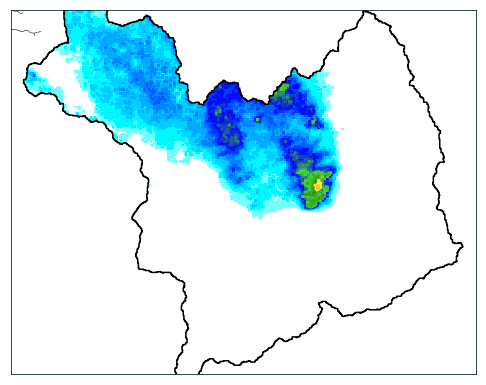

In [9]:
self.plot_basin_rain(vec=vec.sum().values/1000.0)

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


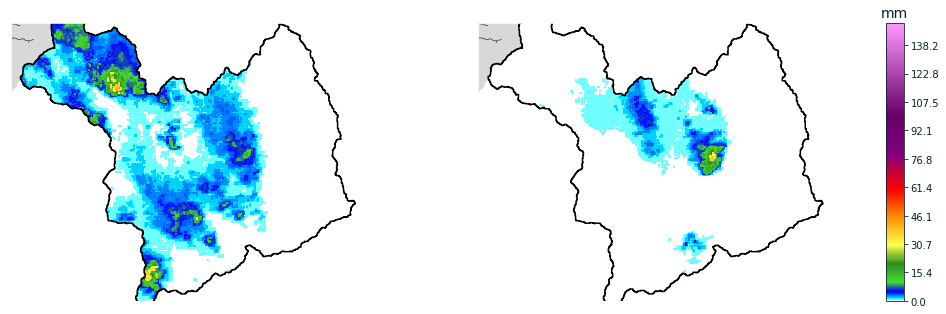

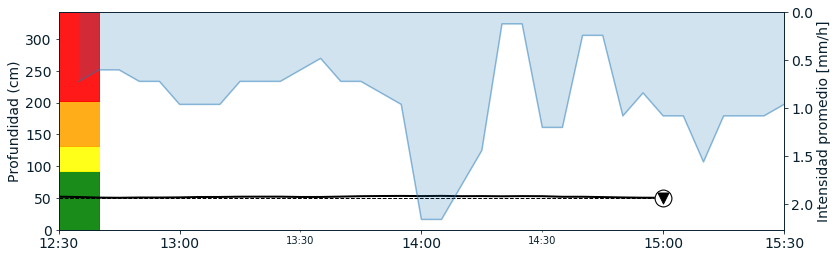

In [10]:
self.rain_report(start)

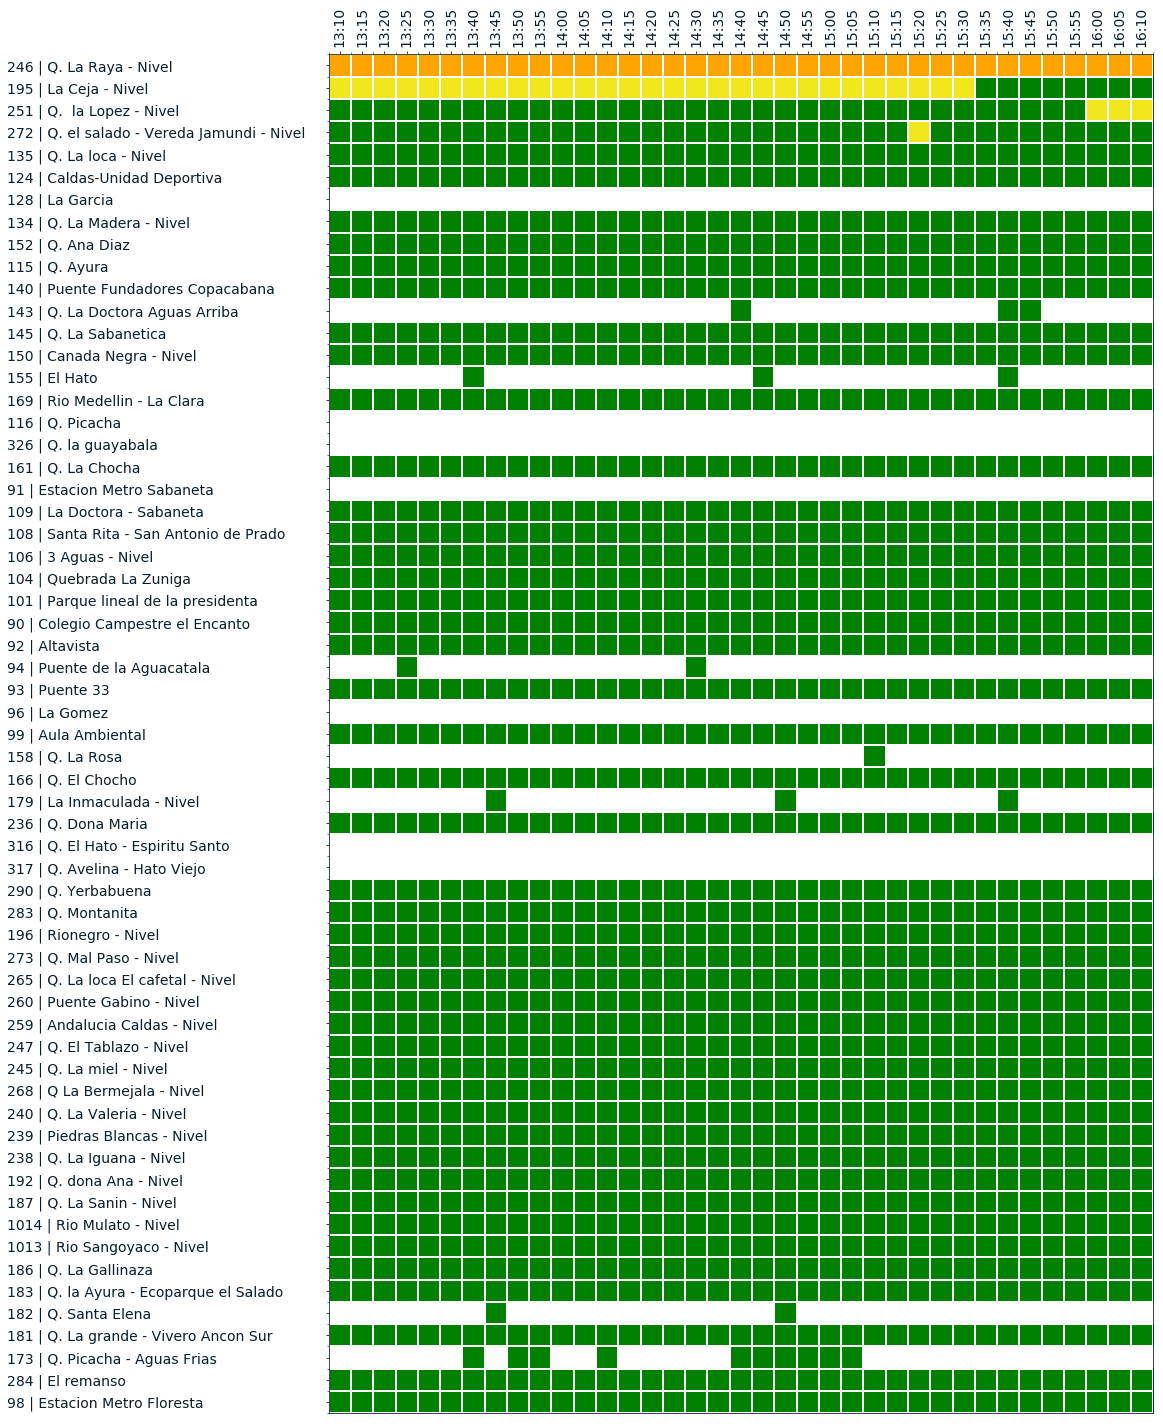

In [11]:
self.reporte_nivel()

In [12]:
import datetime
end = datetime.datetime.now()
start = end - datetime.timedelta(hours=3)

In [13]:
end = datetime.datetime.now()
start = end - datetime.timedelta(minutes=20)
level = self.level_all(start,end)

In [14]:
self.insert_if_exist_update_level(level)

0:00:02.787155


### para saber si insertó bien todos deben ser true

In [15]:
self.level_all(start,end).fillna(0.0) == level.fillna(0.0)

codigo,98,99,96,93,94,92,90,101,104,106,...,260,265,273,196,283,290,317,316,284,326
2018-09-12 15:50:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 15:55:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 16:00:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 16:05:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-09-12 16:10:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


## recordar hacer constraint in data
ALTER TABLE myusers_hydrodata ADD UNIQUE (fk_id,fecha);

In [16]:
level = self.level(start,end,local=True)

In [17]:
level

fecha
2018-09-12 15:50:00    48.550
2018-09-12 15:55:00    48.676
2018-09-12 16:00:00    48.384
2018-09-12 16:05:00    48.128
Name: profundidad, dtype: float64

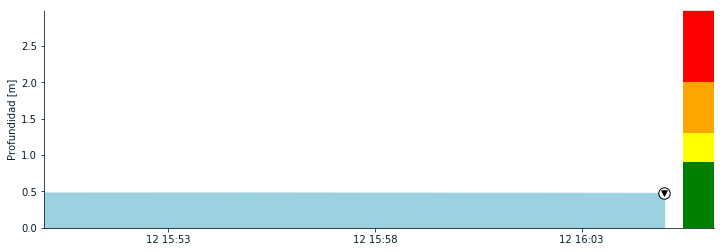

In [18]:
self.plot_level(self.level(start,end,local=True)/100.0)

In [19]:
self = Nivel(codigo=93,**info.LOCAL)

In [20]:
self.last_bat_id

2866

In [21]:
bat = self.last_bat

In [22]:
bat

,id,vertical,x,y,timestamp,updated,fk_id,user_id
0,9517,1,-2.00,3.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
1,9518,2,0.00,3.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
2,9519,3,0.87,2.83,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
3,9520,4,3.27,1.32,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
4,9521,5,4.33,0.93,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
5,9522,6,7.17,-0.37,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
6,9523,7,9.17,-0.14,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
7,9524,8,11.17,-0.15,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
8,9525,9,13.17,-0.14,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1
9,9526,10,15.17,-0.18,2018-09-12 13:31:00,2018-09-12 13:31:00,2866,1


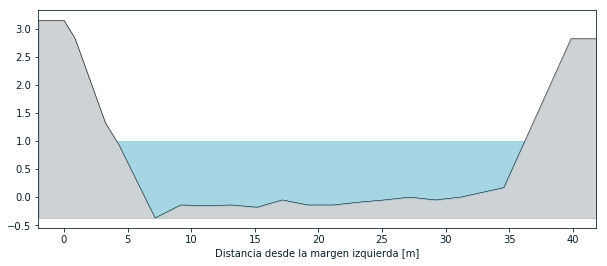

In [23]:
self.plot_section(self.last_bat,level=1.0)